## **Influence of the COVID-19 pandemic on grades**

The goal of this project is to investigate the influence of the COVID-19 pandemic on grade distributions for a university class spanning 6 semesters.

###DATA
Grades for a large, undergraduate intro level course over six semesters: Spring 2019 to Fall 2021. These semesters span from pre-pandemic (SP19 & FA19) to pandemic (SP20-FA21).

###QUESTIONS

1.   Did the pandemic have an influence on grade distributions?
2.   Design a machine learning model for the data. Which machine learning model is most effective? Which features are most predictive of final grade? 
 

###APPROACH

We first load the data from each semester into dictionaries (each semester has a different number of students so dictionaries are easier to use than loading all the data into a single dataframe). We then remove missing data and plot the data. 



###ANSWERS

1.   (Did the pandemic have an influence on grade distributions?) - A: Yes, but only for SP20. The effect was short-lived, with grades rebounding by SP21.
2.   (Design a machine learning model for the data. Which machine learning model is most effective? Which features are most predictive of final grade?) - A: The Random Forest Classifier and Polynomial Kernal SVM models perform similarly (r2 ranges from 80% to 85%). The "Assignments" feature was most predictive of final letter grade.


###CURRENT QUESTIONS

1.   Did variance of each student's grade throughout a semester increase during pandemic (semester-on-semester)?
2.   Obtain more data from other classes; which courses were most impacted? What features of the classes indicated how much grades were impacted?


# **0. Exploratory data analysis and cleaning**

### **The datasets**

### **Data exploration**

First, let's explore what we have!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import math
import colorcet as cc
from numpy import linspace
from scipy.stats.kde import gaussian_kde
from scipy.stats import ks_2samp
!pip install -q gwpy gwpy &> /dev/null # gwpy &> /dev/null silences output
!pip install matplotlib==3.1.3 gwpy &> /dev/null
import matplotlib.pyplot as plt


## Load datasets into dictionaries 
semester_list = ['SP19', 'FA19', 'SP20', 'FA20', 'SP21', 'FA21']  
midterm_cols = np.array([[39, 40],[29, 30],[31, 32],[31, 32],[76, 77],[73, 72]])
final_cols = np.array([[47, 48],[40, 41],[35, 36],[49, 50],[72, 73],[69, 68]])
fulldata_dict = {}
midterm_dict = {}
final_dict = {}
mid_and_final_dict = {}

for index, semester in enumerate(semester_list):
    filename_str = 'Complete_' + semester + '.csv'
    fulldata_dict[semester] = pd.read_csv(filename_str)   # read data
    midterm_dict[semester] = fulldata_dict[semester].iloc[:,midterm_cols[index,]]   # extract midterm grade data
    print(midterm_dict[semester].head())
    final_dict[semester] = fulldata_dict[semester].iloc[:,final_cols[index,]]   # extract final grade data
    print(final_dict[semester].head())
    frames = [midterm_dict[semester], final_dict[semester]]
    mid_and_final_dict[semester] = pd.concat(frames, axis=1, join='inner')    # merge midterm and final data


   Midterm Grade Percentage Column [Total Pts: up to 133 Percentage] |1548277 Midterm Letter Grade [Total Pts: 0 Text] |1548278
0                                           90.78947                                                                          A
1                                           79.69924                                                                          B
2                                           92.10526                                                                          A
3                                           93.60902                                                                          A
4                                            0.00000                                                                        NaN
   Final Percentage [Total Pts: 475 Percentage] |1566944 Final Letter Grade [Total Pts: 100 Text] |1566946
0                                           85.84210                                                     B
1                 

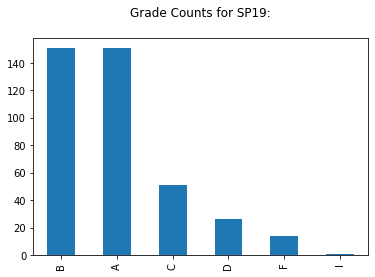

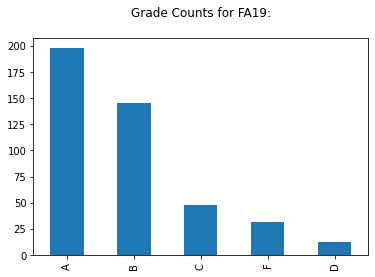

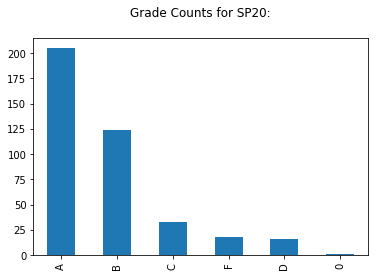

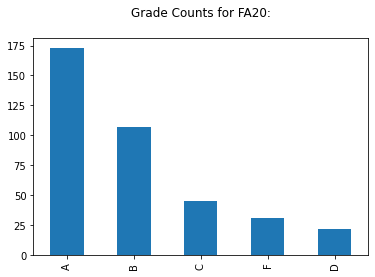

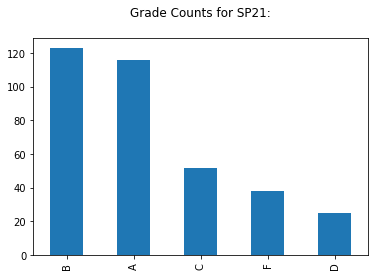

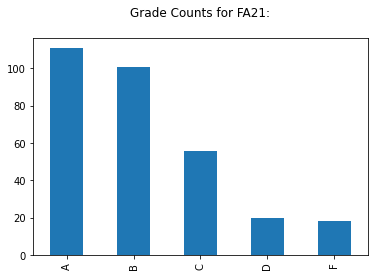

In [16]:
## Visualize what data looks like
# fig, axes = plt.subplots(2,3,figsize=(15,10))
# axes_iter = axes.flat
for index, semester in enumerate(semester_list):
    plt.figure()
    pp = pd.value_counts(final_dict[semester].iloc[:,1])
    pp.plot.bar()
    plt.title('Grade Counts' + ' ' + 'for' + ' ' + semester + ':\n')
    plt.show()

    # axes_iter[index].bar(semester_list,final_dict[semester].iloc[:,1].value_counts())

# plt.show()

In [3]:
# checking duplicates
for index, semester in enumerate(semester_list):
    duplicated_data = fulldata_dict[semester].duplicated().sum()
    duplicated_rows = fulldata_dict[semester].duplicated()
    print('Total Duplicates' + ' ' + 'in' + ' ' + semester + ':\n', duplicated_data)
    print(fulldata_dict[semester].loc[duplicated_rows])


    Food Allergies Survey [Total Pts: 0 Complete/Incomplete] |1479492  ...  Total Extra Credit [Total Pts: 0 Score] |2291988
6                                                  NaN                 ...                                               0.0
18                                                 NaN                 ...                                               0.0
26                                                 NaN                 ...                                               0.0
50                                                 NaN                 ...                                               0.0
67                                                 NaN                 ...                                               0.0
74                                                 NaN                 ...                                               0.0
112                                                NaN                 ...                                               0.0


In [4]:
# Identify the nullity of the dataframe
for index, semester in enumerate(semester_list):
    missing_values_hist = final_dict[semester].isna().sum()
    print('Total Missing Grade Values' + ' ' + 'in' + ' ' + semester + ':\n', missing_values_hist)

Total Missing Grade Values in SP19:
 Final Percentage [Total Pts: 475 Percentage] |1566944    35
Final Letter Grade [Total Pts: 100 Text] |1566946        36
dtype: int64
Total Missing Grade Values in FA19:
 Final Grade Percentage [Total Pts: up to 480 Percentage] |2289825    0
Final Grade Letter [Total Pts: up to 480 Letter] |2289813            0
dtype: int64
Total Missing Grade Values in SP20:
 Final Percentage [Total Pts: 480 Percentage] |1714612    5
Final Letter Grade [Total Pts: 100 Text] |1714613        4
dtype: int64
Total Missing Grade Values in FA20:
 Final Percentage [Total Pts: 0 Text] |2023928      47
Final Letter Grade [Total Pts: 0 Text] |2027259    47
dtype: int64
Total Missing Grade Values in SP21:
 Midterm Percentage [Total Pts: up to 197 Percentage] |2104492    0
Midterm Letter Grade [Total Pts: up to 197 Letter] |2273458      0
dtype: int64
Total Missing Grade Values in FA21:
 Final Grade Percentage [Total Pts: up to 588 Percentage] |2281849    0
Final Grade Letter [

In [5]:
# Identify the percentage of nullity in the dataframe for each column
for index, semester in enumerate(semester_list):
    missing_values_hist_perc = final_dict[semester].isnull().mean() * 100
    print('Percentage of Missing Grade Values' + ' ' + 'in' + ' ' + semester + ':\n', missing_values_hist_perc)

Percentage of Missing Grade Values in SP19:
 Final Percentage [Total Pts: 475 Percentage] |1566944    8.139535
Final Letter Grade [Total Pts: 100 Text] |1566946        8.372093
dtype: float64
Percentage of Missing Grade Values in FA19:
 Final Grade Percentage [Total Pts: up to 480 Percentage] |2289825    0.0
Final Grade Letter [Total Pts: up to 480 Letter] |2289813            0.0
dtype: float64
Percentage of Missing Grade Values in SP20:
 Final Percentage [Total Pts: 480 Percentage] |1714612    1.246883
Final Letter Grade [Total Pts: 100 Text] |1714613        0.997506
dtype: float64
Percentage of Missing Grade Values in FA20:
 Final Percentage [Total Pts: 0 Text] |2023928      11.058824
Final Letter Grade [Total Pts: 0 Text] |2027259    11.058824
dtype: float64
Percentage of Missing Grade Values in SP21:
 Midterm Percentage [Total Pts: up to 197 Percentage] |2104492    0.0
Midterm Letter Grade [Total Pts: up to 197 Letter] |2273458      0.0
dtype: float64
Percentage of Missing Grade Va

### **Dealing with missing data**

In [17]:
## Clean data and store in dataframe
complete_mid_and_final = pd.DataFrame()
for index, semester in enumerate(semester_list):

    midterm_dict[semester] = fulldata_dict[semester].iloc[:,midterm_cols[index,]]   # extract midterm grade data
    final_dict[semester] = fulldata_dict[semester].iloc[:,final_cols[index,]]   # extract final grade data
    
    # handle missing data: remove rows with zeroes or NaNs in the grade columns
    fulldata_dict[semester] = fulldata_dict[semester].loc[fulldata_dict[semester].iloc[:,midterm_cols[index,0]] > 0.0001]
    fulldata_dict[semester].dropna(subset=[fulldata_dict[semester].columns[midterm_cols[index,0]],fulldata_dict[semester].columns[midterm_cols[index,1]]], how = 'any', inplace = True)

    fulldata_dict[semester] = fulldata_dict[semester].loc[fulldata_dict[semester].iloc[:,final_cols[index,0]] > 0.0001]
    fulldata_dict[semester].dropna(subset=[fulldata_dict[semester].columns[final_cols[index,0]],fulldata_dict[semester].columns[final_cols[index,1]]], how = 'any', inplace = True)

    # normalize
    mask_midterm = fulldata_dict[semester].iloc[:,midterm_cols[index,0]] > 100
    fulldata_dict[semester].iloc[mask_midterm, midterm_cols[index,[0]]] = 100

    mask_final = fulldata_dict[semester].iloc[:,final_cols[index,0]] > 100
    fulldata_dict[semester].iloc[mask_final, final_cols[index,[0]]] = 100

    # remove student who received an 'incomplete' 
    fulldata_dict[semester] = fulldata_dict[semester].loc[(fulldata_dict[semester].iloc[:,final_cols[index,1]] != 'I')]

    # rename columns
    midterm_dict[semester].columns = ['Midterm Percentage', 'Midterm Letter']
    final_dict[semester].columns = ['Final Percentage', 'Final Letter']
    frames = [midterm_dict[semester], final_dict[semester]]
    mid_and_final_dict[semester] = pd.concat(frames, axis=1, join='inner')    # merge midterm and final data

    # add semester column
    mid_and_final_dict[semester].insert(0,'Semester', semester)
  
    # put them all together
    complete_mid_and_final = pd.concat([complete_mid_and_final, mid_and_final_dict[semester]], ignore_index=True)

    # make sure duplicates are removed
    duplicated_data_check = fulldata_dict[semester].duplicated().sum()
    print('Total Duplicates' + ' ' + 'in' + ' ' + semester + ':\n', duplicated_data_check)

    # make sure NaNs are removed
    missing_data_check = fulldata_dict[semester].iloc[:,final_cols[index,1]].isna().sum()
    print('Total Missing Grade Values' + ' ' + 'in' + ' ' + semester + ':\n', missing_data_check)

# check the new datafraame containing midterm and final grades
print(complete_mid_and_final.info())

Total Duplicates in SP19:
 0
Total Missing Grade Values in SP19:
 0
Total Duplicates in FA19:
 0
Total Missing Grade Values in FA19:
 0
Total Duplicates in SP20:
 0
Total Missing Grade Values in SP20:
 0
Total Duplicates in FA20:
 0
Total Missing Grade Values in FA20:
 0
Total Duplicates in SP21:
 0
Total Missing Grade Values in SP21:
 0
Total Duplicates in FA21:
 0
Total Missing Grade Values in FA21:
 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Semester            2240 non-null   object 
 1   Midterm Percentage  2240 non-null   float64
 2   Midterm Letter      2240 non-null   object 
 3   Final Percentage    2240 non-null   float64
 4   Final Letter        2240 non-null   object 
dtypes: float64(2), object(3)
memory usage: 87.6+ KB
None


# **1. Data Visualization**

### **Histograms**

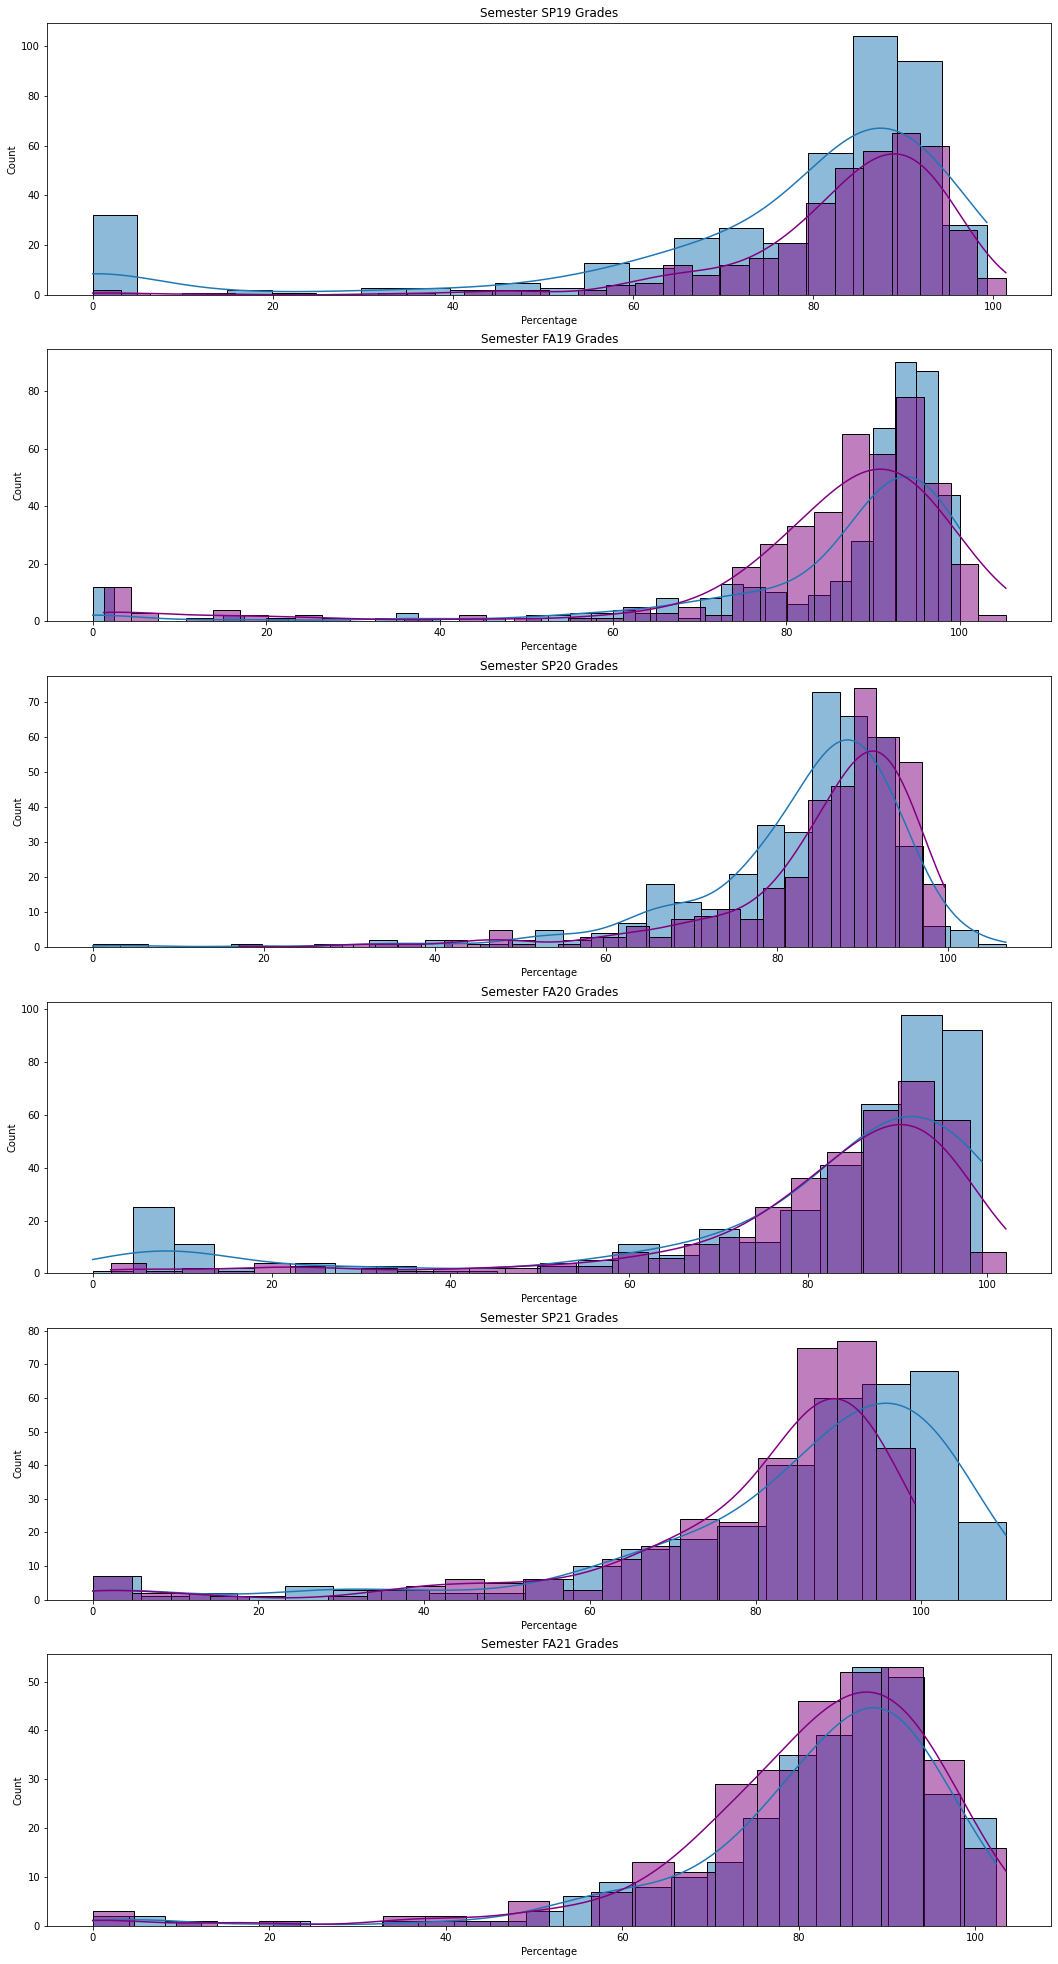

In [7]:
# plot midterm and final grades by semester
fig, axes = plt.subplots(6)
fig.set_size_inches(18, 35, forward=True)

for index, semester in enumerate(semester_list):
    sns.histplot(midterm_dict[semester].iloc[:,0], kde=True, ax=axes[index]).set(title='Semester' + ' ' + semester + ' ' + 'Grades', xlabel='Percentage')
    sns.histplot(final_dict[semester].iloc[:,0], kde=True, ax=axes[index], color = "purple")

plt.show()

# print(final_dict['SP21'].iloc[:,1].value_counts())

### **Ridge plot**

<Figure size 2280x1520 with 0 Axes>

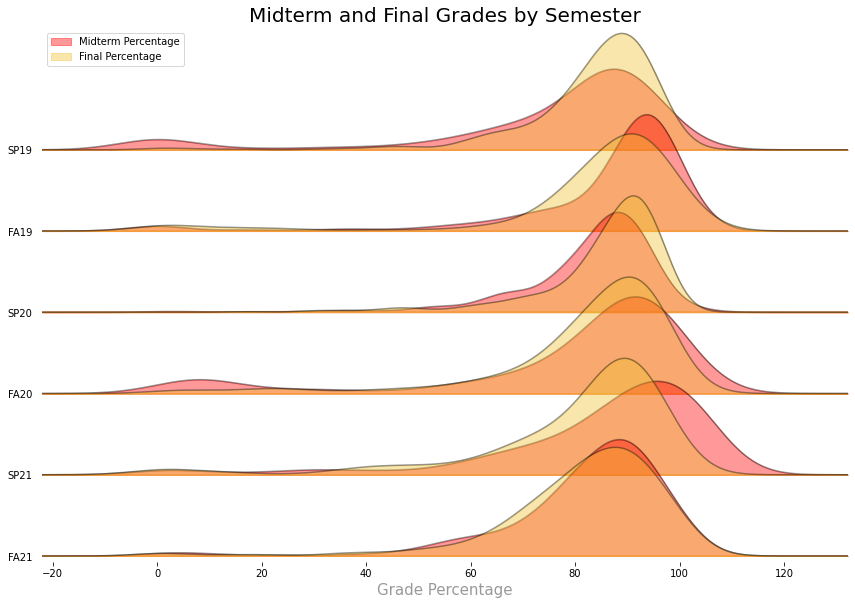

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


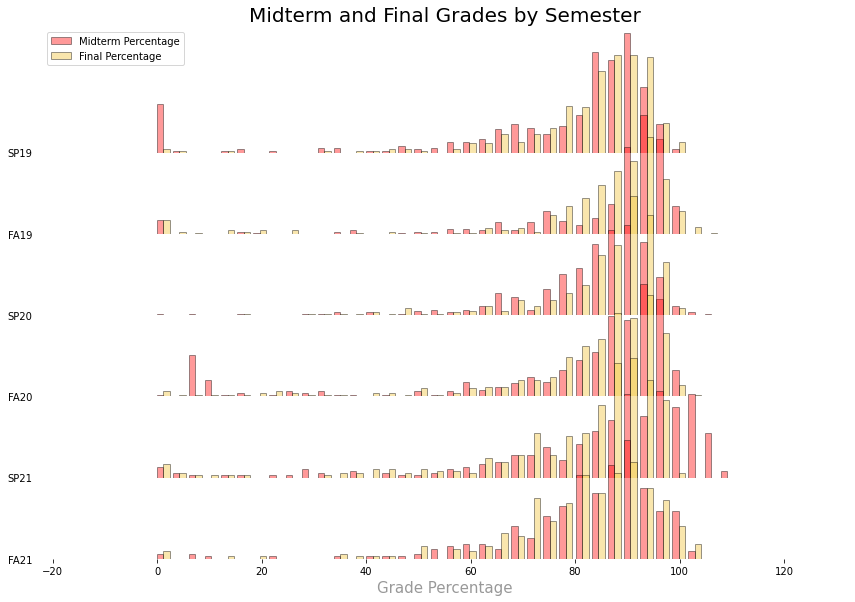

In [8]:
!pip install joypy gwpy &> /dev/null # gwpy &> /dev/null silences output
import joypy

# with joypy
plt.figure(dpi= 380)

grouped = complete_mid_and_final.groupby("Semester", sort=False)

# ridge plot smooth
fig1, axes1 = joypy.joyplot(grouped, column=['Midterm Percentage', 'Final Percentage'], ylim='own', figsize=(12,8), color=['red', '#f1c232'], legend = True, alpha=0.4)
plt.title('Midterm and Final Grades by Semester', fontsize=20, color='k', alpha=1)
plt.rc("font", size=10)
plt.xlabel('Grade Percentage',  fontsize=15, alpha=0.4)
axes1[0].legend(loc = "upper left")

plt.show()

# ridge plot histograms
fig2, axes2 = joypy.joyplot(grouped, column=['Midterm Percentage', 'Final Percentage'], hist=True, bins=50, ylim='own', figsize=(12,8), color=['red', '#f1c232'], legend = True, alpha=0.4)

# adding labels
plt.title('Midterm and Final Grades by Semester', fontsize=20, color='k', alpha=1)
plt.rc("font", size=10)
plt.xlabel('Grade Percentage',  fontsize=15, alpha=0.4)
axes2[0].legend(loc = "upper left")

plt.show()



### **Kolmogorov–Smirnov Tests of midterm and final grades within semesters**

In [18]:
from scipy.stats.kde import gaussian_kde
from scipy.stats import ks_2samp


# conduct two-sample KS tests within semesters
class bcolors:
    OKGREEN = '\033[92m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'

for index, semester in enumerate(semester_list):
    ks_semesters = ks_2samp(midterm_dict[semester].iloc[:,0], final_dict[semester].iloc[:,0])
    print('KS for final and midterm grades' + ' ' + semester + ': \n', ks_semesters)
    if ks_semesters[1] < 0.05:
      print(f"{bcolors.FAIL}{bcolors.BOLD}The distributions are significantly different{bcolors.ENDC}")
    else:
      print(f"{bcolors.OKGREEN}The distributions are not significantly different{bcolors.ENDC}")
    print('\n')

KS for final and midterm grades SP19: 
 Ks_2sampResult(statistic=0.09462915601023018, pvalue=0.060270778292182386)
The distributions are not significantly different


KS for final and midterm grades FA19: 
 Ks_2sampResult(statistic=0.2127659574468085, pvalue=8.52892291830149e-09)
The distributions are significantly different


KS for final and midterm grades SP20: 
 Ks_2sampResult(statistic=0.18686868686868688, pvalue=1.852443796171999e-06)
The distributions are significantly different


KS for final and midterm grades FA20: 
 Ks_2sampResult(statistic=0.15649867374005305, pvalue=0.0001904821568006381)
The distributions are significantly different


KS for final and midterm grades SP21: 
 Ks_2sampResult(statistic=0.2910662824207493, pvalue=2.324355158274044e-13)
The distributions are significantly different


KS for final and midterm grades FA21: 
 Ks_2sampResult(statistic=0.058823529411764705, pvalue=0.6657765842348662)
The distributions are not significantly different




### **Violin Plots of Final Grades by Semester**

  Semester  Midterm Percentage Midterm Letter  Final Percentage Final Letter
0     SP19            90.78947              A          85.84210            B
1     SP19            79.69924              B          79.68421            B
2     SP19            92.10526              A          92.63157            A
3     SP19            93.60902              A          96.94736            A
4     SP19            85.33834              B          84.73684            B


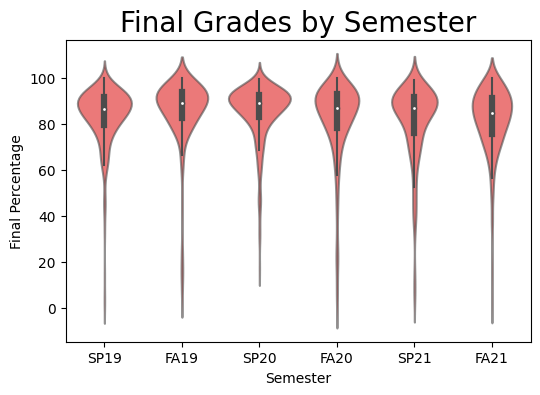

In [19]:
plt.figure(dpi= 100)
ax = sns.violinplot(x = "Semester", y = "Final Percentage", data = complete_mid_and_final, color = "red")
for violin, alpha in zip(ax.collections[::2], [0.6,0.6,0.6,0.6,0.6,0.6]):
    violin.set_alpha(alpha)
plt.title('Final Grades by Semester', fontsize=20, color='k', alpha=1)

print(complete_mid_and_final.head())


### **KS Tests of final grades between semesters**

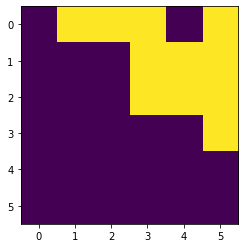

In [20]:
data_matrix = np.zeros(shape=(len(semester_list),len(semester_list)))
for index, semester in enumerate(semester_list):
    for index_compare in range(index+1, len(semester_list)):
        ks2_test = ks_2samp(final_dict[semester].iloc[:,0], final_dict[semester_list[index_compare]].iloc[:,0])[1]  # [1] means take second output
        if ks2_test < 0.05:
            data_matrix[index, index_compare] = 1
        else:
            data_matrix[index, index_compare] = 0
        # print('index: ' + str(index))
        # print('index_compare: ' + str(index_compare))

plt.imshow(data_matrix)

### **Letter grade counts by semester**

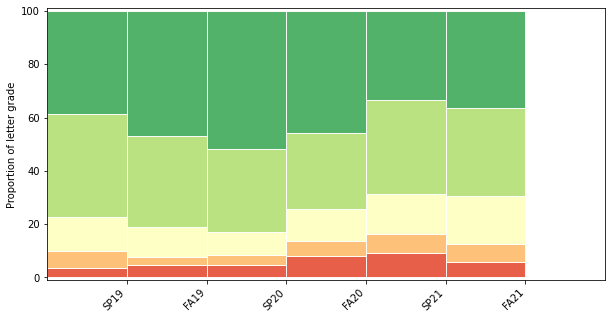

In [21]:
# construct dataframe using list comprehensions on each letter grade
letter_grades_counts = {'Semester': semester_list,
                 'A': [np.count_nonzero(final_dict[semester].iloc[:,1].values == 'A') for semester in semester_list],
                 'B': [np.count_nonzero(final_dict[semester].iloc[:,1].values == 'B') for semester in semester_list],
                 'C': [np.count_nonzero(final_dict[semester].iloc[:,1].values == 'C') for semester in semester_list],
                 'D': [np.count_nonzero(final_dict[semester].iloc[:,1].values == 'D') for semester in semester_list],
                 'F': [np.count_nonzero(final_dict[semester].iloc[:,1].values == 'F') for semester in semester_list],
                 }

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(letter_grades_counts['A']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m in zip(letter_grades_counts['A'], letter_grades_counts['B'], letter_grades_counts['C'], letter_grades_counts['D'], letter_grades_counts['F'])]

A_grade = [i / j * 100 for  i,j in zip(letter_grades_counts['A'], totals)]
B_grade = [i / j * 100 for  i,j in zip(letter_grades_counts['B'], totals)]
C_grade = [i / j * 100 for  i,j in zip(letter_grades_counts['C'], totals)]
D_grade = [i / j * 100 for  i,j in zip(letter_grades_counts['D'], totals)]
F_grade = [i / j * 100 for  i,j in zip(letter_grades_counts['F'], totals)]

# Create bar chart 
ax.bar(bar_l, 
       F_grade, 
       label='F',
       alpha=0.9, 
       color='#E54E35', 
       width=bar_width,
       edgecolor='white'
       )

ax.bar(bar_l, 
       D_grade, 
       bottom=F_grade, 
       label='D',
       alpha=0.9, 
       color='#FDBB6C', 
       width=bar_width,
       edgecolor='white'
       )

ax.bar(bar_l, 
       C_grade, 
       bottom=[i+j for i,j in zip(D_grade, F_grade)], 
       label='C',
       alpha=0.9, 
       color='#FEFFBE', 
       width=bar_width,
       edgecolor='white'
       )

ax.bar(bar_l, 
       B_grade, 
       bottom=[i+j+k for i,j,k in zip(C_grade, D_grade, F_grade)], 
       label='B', 
       alpha=0.9, 
       color='#B3DF72', 
       width=bar_width,
       edgecolor='white'
       )

ax.bar(bar_l, 
       A_grade, 
       label='A', 
       bottom=[i+j+k+l for i,j,k,l in zip(B_grade, C_grade, D_grade, F_grade)], 
       alpha=0.9, 
       color='#3FAA59',
       width=bar_width,
       edgecolor='white'
       )


# Set the ticks to be first names
plt.xticks(tick_pos, letter_grades_counts['Semester'])
ax.set_ylabel("Proportion of letter grade")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-1, 101)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

# **Comparison of Final Grade Variances Between Semesters**

### **Levene's Test**

In [125]:
from scipy.stats import levene

for index, semester in enumerate(semester_list):
    for index_compare in range(index+1, len(semester_list)):
        levene_test = levene(final_dict[semester].iloc[:,0],final_dict[semester_list[index_compare]].iloc[:,0], center='median', proportiontocut=0.05)
        print('Levene Test between ' + semester + ' and ' + semester_list[index_compare] + ': \n', levene_test)
        if levene_test[1] < 0.05:
          print(f"{bcolors.FAIL}{bcolors.BOLD}The variances are significantly different{bcolors.ENDC}")
        else:
          print(f"{bcolors.OKGREEN}The variances are not significantly different{bcolors.ENDC}")
        print('\n')



Levene Test between SP19 and FA19: 
 LeveneResult(statistic=0.6672068008203932, pvalue=0.41426671973648266)
The variances are not significantly different


Levene Test between SP19 and SP20: 
 LeveneResult(statistic=0.28020813285935897, pvalue=0.5967144884955384)
The variances are not significantly different


Levene Test between SP19 and FA20: 
 LeveneResult(statistic=9.786881562707174, pvalue=0.0018241753477852406)
The variances are significantly different


Levene Test between SP19 and SP21: 
 LeveneResult(statistic=9.22560351106428, pvalue=0.0024708672091988855)
The variances are significantly different


Levene Test between SP19 and FA21: 
 LeveneResult(statistic=5.811310992907954, pvalue=0.016181985356568184)
The variances are significantly different


Levene Test between FA19 and SP20: 
 LeveneResult(statistic=1.6310599698801338, pvalue=0.20191933185296224)
The variances are not significantly different


Levene Test between FA19 and FA20: 
 LeveneResult(statistic=4.7091075173172

# **Machine Learning Models**

### **Preprocessing and Feature Engineering**

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# get rid of warning output
pd.options.mode.chained_assignment = None

# define features and target variable
X_cols = np.array([range(52,56),range(42,46),range(55,59),range(51,55),range(81,85),range(77, 81)])
y_cols = np.array([[48],[41],[36],[50],[77],[68]])

X_dict = {}
y_dict = {}
X = pd.DataFrame()
y = pd.DataFrame()

for index, semester in enumerate(semester_list):
    # extract feature data
    X_dict[semester] = fulldata_dict[semester].iloc[:,X_cols[index,]]

    # extract target data
    y_dict[semester] = fulldata_dict[semester].iloc[:,y_cols[index,]]

    # convert "Total Extra Credit" to binary (completed (True) vs. not completed (False)) and add it as a new column
    for row_idx in range(X_dict[semester].shape[0]):
        if X_dict[semester].iloc[row_idx,3] > 0:
            X_dict[semester]['Extra Credit'] = True
        else:
            X_dict[semester]['Extra Credit'] = False

    # delete old extra credit column
    X_dict[semester].drop(X_dict[semester].columns[[3]], axis = 1, inplace = True)

    # rename columns
    X_dict[semester].columns = ['Assignments', 'Exams','Attendance', 'Extra Credit']
    y_dict[semester].columns = ['Final Letter Grade']

    # put all semesters together
    X = pd.concat([X, X_dict[semester]], ignore_index=True)
    y = pd.concat([y, y_dict[semester]], ignore_index=True)

# label_encoder object
label_encoder = LabelEncoder()

# Encode labels in column. 
y['Final Letter Grade']= label_encoder.fit_transform(y['Final Letter Grade']) 

print(y.value_counts())
print(y.head(10))


Final Letter Grade
0                     1044
1                      687
2                      265
4                      128
3                      116
dtype: int64
   Final Letter Grade
0                   1
1                   1
2                   0
3                   0
4                   1
5                   0
6                   0
7                   1
8                   1
9                   0


### **Random forest modelling**

In [84]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score
from yellowbrick.classifier import ClassificationReport

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train.values.ravel())

print(utils.multiclass.type_of_target(y_train))

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)

# evaluate performance with confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# evaluate performance with r2
score=r2_score(y_test,y_pred)

print("Accuracy for our testing dataset using RandomForestClassifier is : {:.3f}%".format(score*100)) 

multiclass
[[290  47   1   0   0]
 [ 43 142  13   0   0]
 [  1  25  40   3   0]
 [  0   1   6  22   2]
 [  0   0   0   4  32]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       338
           1       0.66      0.72      0.69       198
           2       0.67      0.58      0.62        69
           3       0.76      0.71      0.73        31
           4       0.94      0.89      0.91        36

    accuracy                           0.78       672
   macro avg       0.78      0.75      0.76       672
weighted avg       0.79      0.78      0.78       672

Accuracy for our testing dataset using RandomForestClassifier is : 81.557%


### **Random Forest Feature Importance**

In [44]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

feature_importances=pd.DataFrame({'features':X_train.columns,'feature_importance':clf.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)


,features,feature_importance
0,Assignments,0.527161
1,Exams,0.307338
2,Attendance,0.130636
3,Extra Credit,0.034865


### **SVM modelling**

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train.values.ravel())

# Train the model using the training sets y_pred=clf.predict(X_test)

svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

# evaluate performance with confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# evaluate performance with r2
score=r2_score(y_test,y_pred)

print("Accuracy for our testing dataset using Polynomial Kernel SVM is : {:.3f}%".format(score*100))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[272  41   1   0   0]
 [ 30 147  15   0   0]
 [  0  24  57   2   0]
 [  0   1   3  31   5]
 [  0   0   0   3  40]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       314
           1       0.69      0.77      0.73       192
           2       0.75      0.69      0.72        83
           3       0.86      0.78      0.82        40
           4       0.89      0.93      0.91        43

    accuracy                           0.81       672
   macro avg       0.82      0.80      0.81       672
weighted avg       0.82      0.81      0.82       672

Accuracy for our testing dataset using Polynomial Kernel SVM is : 86.112%


### **Feature Importance with SHAP**

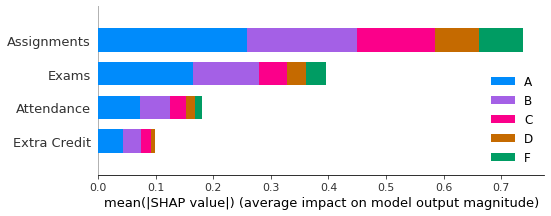

In [46]:
from sklearn.inspection import permutation_importance
! pip install shap gwpy &> /dev/null # gwpy &> /dev/null silences output
import shap
from matplotlib import pyplot as plt

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

grade_labels = ['A','B','C','D','F']

shap.summary_plot(shap_values, X_test, plot_type="bar", class_names = grade_labels, title="Feature Importance with SHAP")